In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
cd /content/drive/My Drive/FastCampus

/content/drive/My Drive/FastCampus


# <center>__컨텐츠 팀__</center>
# <center>__결과 보고서__</center>



##__1. 프로젝트 수행 목적__
###동기  
  + 개봉 예정 영화에 대한 흥행 정도에 대한 호기심  

###목적
  + 개봉 예정된 영화에 대한 흥행 정도를 기대지수, 감복 및 배우의 수상 경력 등의 지표로 나누어
  수치화.



##__2. 데이터 수집__

### A. 개봉 예정 영화 데이터 수집

 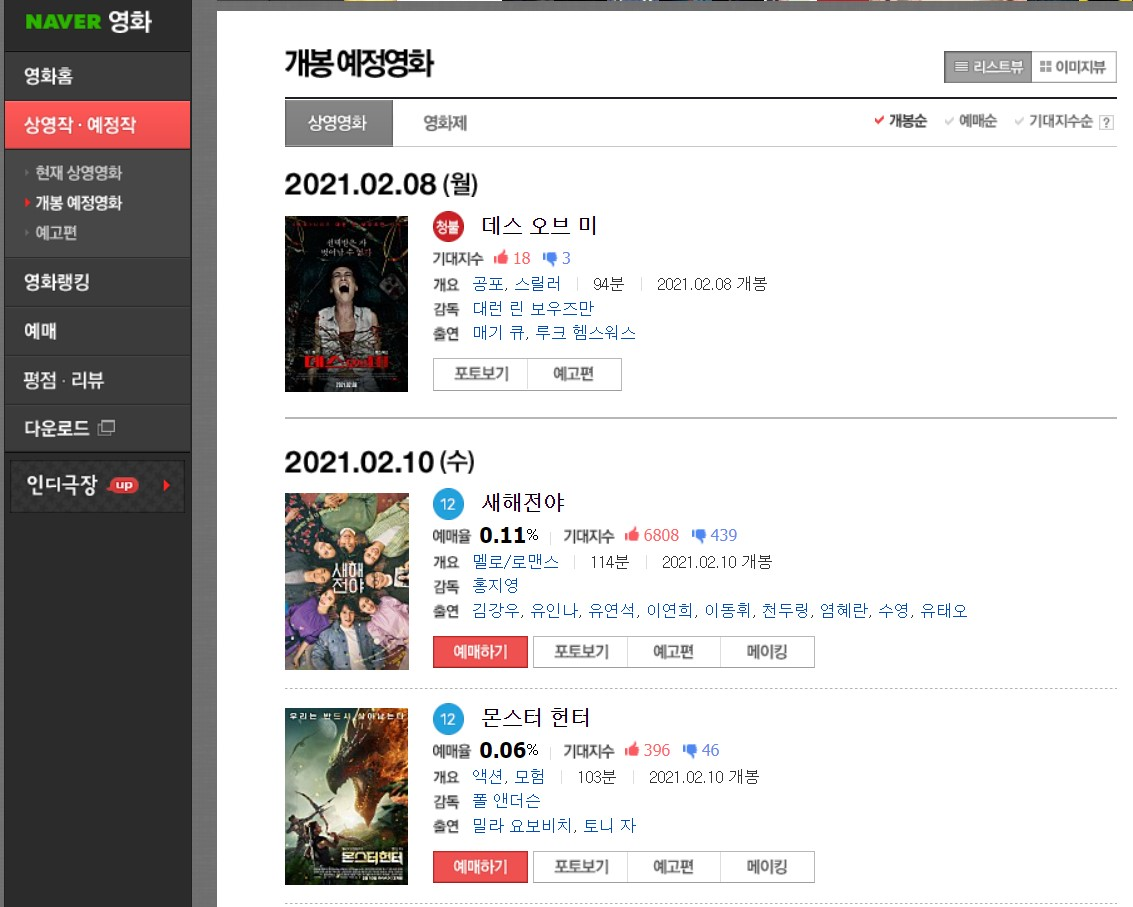

 

##### URL 및 Request로 HTML 불러오기

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re

# 네이버 영화 url
url = "https://movie.naver.com/movie/running/premovie.nhn"
# requests 요청
response = requests.get(url)
# 응답 확인
response
# 해당 text를 html로 변환
html = BeautifulSoup(response.text,"html.parser")
# 특정 태그 선택
data = html.select('div.obj_section div.lst_wrap ul.lst_detail_t1 li')

#### 사용된 Column명

In [2]:
                        # 설명              Column Name
                        # 
names = []              # 영화 제목         Name Actor
directors = []          # 영화 감독명       Director
actors = []             # 영화 배우명       Actor
ratings = []            # 영화 관람등급     Rating
genres = []             # 영화 장르         Genre
times = []              # 영화 상영시간     Time
release_dates = []      # 영화 개봉예정일   Release Date
anticipate_up = []      # 기대지수 UP       anticipate Up
anticipate_down = []    # 기대지수 DOWN     anticipate Down


#### 데이터 프레임 생성

In [3]:
for item in data:
    # 각 컬럼별 태그 위치를 찾아서 리스트에 추가, 없다면 결측치 입력
    try:
        names.append(item.select('dl.lst_dsc dt.tit a')[0].text.strip())
    except IndexError:
        names.append(None)
    try:
        directors.append(re.sub('[\r\t\n]','',item.select('dl.lst_dsc dl.info_txt1 dd')[1].text.strip()))
    except IndexError:
        directors.append(None)
    try:
        actors.append(re.sub('[\r\t\n]','',item.select('dl.lst_dsc dl.info_txt1 dd')[2].text.strip()))
    except IndexError:
        actors.append(None)
    try:
        ratings.append(item.select('dl.lst_dsc dt.tit span')[0].text.strip())
    except IndexError:
        ratings.append(None)
    try:
        genre = item.select('dl.lst_dsc dl.info_txt1 dd')[0].select('a')[0].text.strip()
        if len(item.select('dl.lst_dsc dl.info_txt1 dd')[0].select('a')) > 1:
            for i in item.select('dl.lst_dsc dl.info_txt1 dd')[0].select('a')[1:]:
                genre += f', {i.text.strip()}'
        genres.append(genre)
    except IndexError:
        genres.append(None)
    try:
        star =  item.select('dl.lst_dsc dd.star dl.info_exp em')
        anticipate_up.append(star[0].text.strip())
        anticipate_down.append(star[1].text.strip())
    except IndexError:
        anticipate_up.append(None)
        anticipate_down.append(None)
    instance = re.sub('[\r\t\n]','',item.select('dl.info_txt1 dd')[0].text.strip()).split('|')
    tflag = False
    rflag = False
    for i in instance:
        if '분' in i:
            times.append(i.replace("분",""))
            tflag = True
        elif '개봉' in i:
            release_dates.append(i.replace("개봉","").strip())
            rflag = True
        else :
            continue
    if tflag == False :
        times.append(None)
    if rflag == False:
        release_dates.append(None)

# 데이터 프레임 생성
df = pd.DataFrame(columns=['Name','Director','Actor','Rating','Genre','Time','Release Date'])
df['Name'] = names
df['Director'] = directors
df['Actor'] = actors
df['Rating'] = ratings
df['Genre'] = genres
df['Time'] = times
df['Release Date'] = release_dates
df['anticipate Up'] = anticipate_up
df['anticipate Down'] = anticipate_down
# 기대지수가 없는 경우(재개봉)를 제외한 새로운 데이터프레임 생성
df2 = df.dropna(subset=['anticipate Up'])
# 인덱스 재지정 및 삭제
df2.reset_index(inplace=True)
del df2['index']

df.to_csv('./movie_final.csv',encoding='utf-8-sig')
df2.to_csv('./movies_2.csv',encoding='utf-8-sig')
up = df2['anticipate Up'].array
down = df2['anticipate Down'].array
sum = []
for i,j in zip(up,down):
    sum.append(i+j)

#### [DF]개봉 예정 영화별 데이터

In [4]:
df2

,Name,Director,Actor,Rating,Genre,Time,Release Date,anticipate Up,anticipate Down
0,데스 오브 미,대런 린 보우즈만,"매기 큐, 루크 헴스워스",청소년 관람불가,"공포, 스릴러",94,2021.02.08,18,3
1,새해전야,홍지영,"김강우, 유인나, 유연석, 이연희, 이동휘, 천두링, 염혜란, 수영, 유태오",12세 관람가,멜로/로맨스,114,2021.02.10,6819,439
2,몬스터 헌터,폴 앤더슨,"밀라 요보비치, 토니 자",12세 관람가,"액션, 모험",103,2021.02.10,397,46
3,아이,김현탁,"김향기, 류현경, 염혜란",15세 관람가,드라마,113,2021.02.10,854,81
4,살아남은 사람들,버르너바시 토트,"카롤리 하이덕, 마리 나기, 아비겔 소크",15세 관람가,"드라마, 멜로/로맨스",88,2021.02.10,61,1
...,...,...,...,...,...,...,...,...,...
60,피넛 버터 팔콘,"타일러 닐슨, 마이크 슈왈츠","샤이아 라보프, 다코타 존슨, 잭 고츠아전, 존 호키스",12세 관람가,드라마,97,2021.03,37,4
61,추룡 2 : 패왕,"왕정, 관지요","양가휘, 고천락, 임가동, 임달화",15세 관람가,"액션, 범죄, 스릴러",101,2021.04.08,5,3
62,분노의 질주: 더 얼티메이트,저스틴 린,"빈 디젤, 존 시나, 샤를리즈 테론, 미셸 로드리게즈, 조다나 브류스터",None,액션,None,2021.05,10698,297
63,007 노 타임 투 다이,캐리 후쿠나가,"다니엘 크레이그, 라미 말렉, 라샤나 린치, 레아 세이두",None,액션,None,2021.10,5240,188


### B. 작품 참여 인물들의 수상 내역 수치화

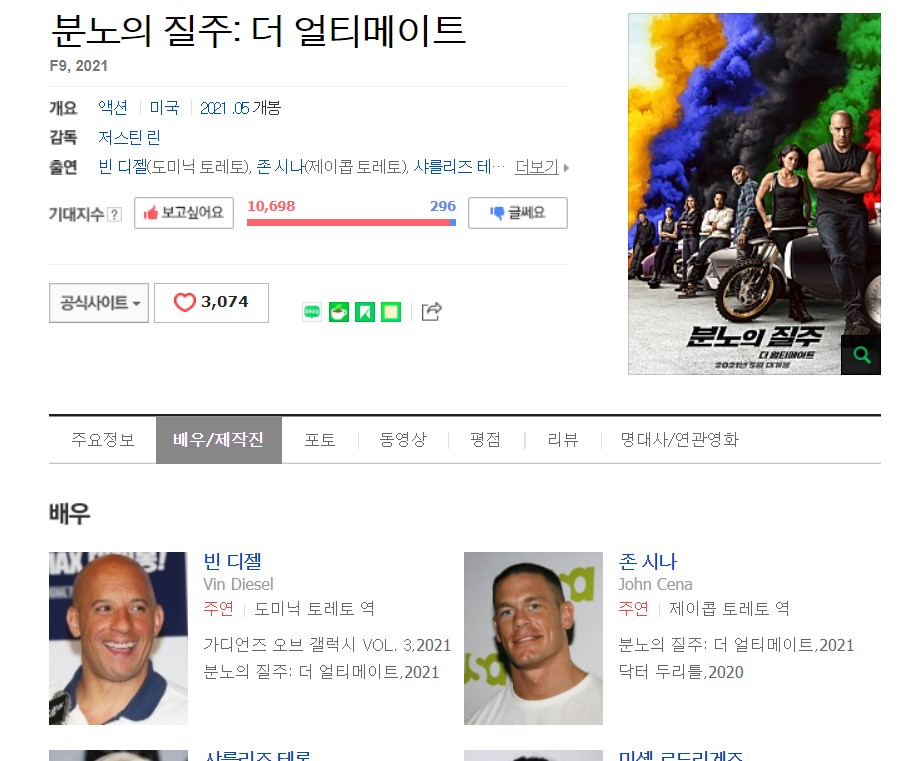

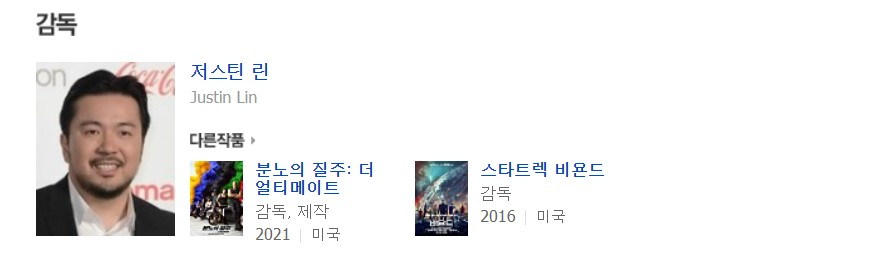

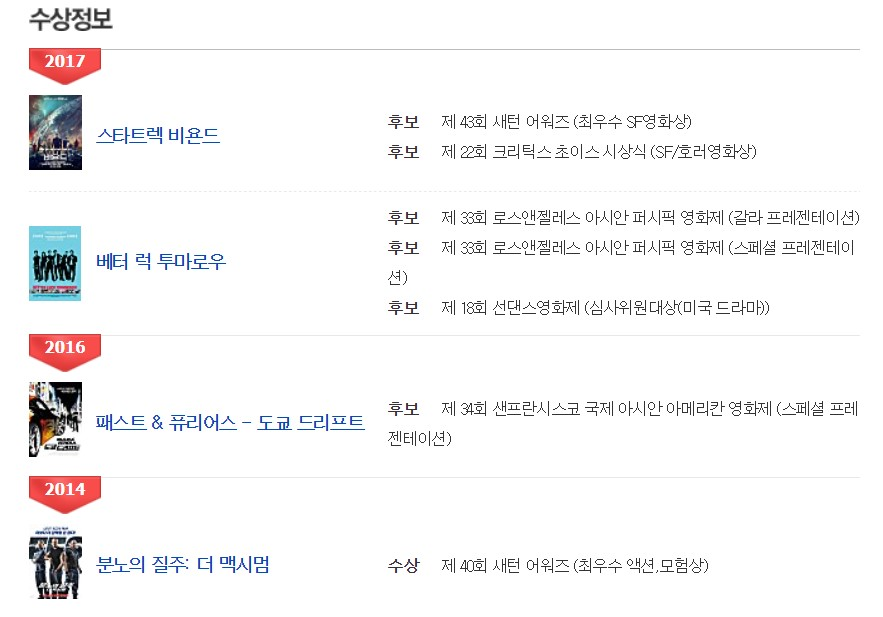

#### 데이터 프레임 생성

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://movie.naver.com/movie/running/premovie.nhn?order=interestRate'
response = requests.get(url).text
# html로 변환
html = BeautifulSoup(response, 'html.parser')
movie = []
people_url = []
# 영화 한 편마다 for문 반복
for i in range(len(html.select('.lst_detail_t1 li'))):
    # s 변수에 영화 한 편씩 정보 저장
    s = html.select('.lst_detail_t1 li')[i]
#     print(s.select("dt.tit a")[0].text.strip())
    # 영화 제목 저장
    movie.append(s.select("dt.tit a")[0].text.strip())
    # 영화 감독, 출연 인물 url 저장
    tem_url = []
    for i in range(len(s.select(".link_txt a"))):
        ht = 'https://movie.naver.com' + s.select(".link_txt a")[i].get('href')
        if ht.find('genre') == -1:
            tem_url.append(ht)
    people_url.append(tem_url)
# 수상정보, 수상 이름 저장
award = []
award_name = []
name  = []
for url_no in range(len(people_url)):
    award_2 = []
    award_3 = []
    for url_num in range(len(people_url[url_no])):
        url2 = people_url[url_no][url_num]
        html2 = requests.get(url2)
        bs2 = BeautifulSoup(html2.text,"html.parser")
        for i in range(len(bs2.select('.award_result'))):
            award_2.append(bs2.select('.award_result')[i].text.strip())
            # 수상 내역
            #print(bs2.select('.award_info')[i].text.strip())
            award_3.append(bs2.select('.award_info')[i].text.strip())
#         print("수상", award_2)
    award.append(award_2)
    award_name.append(award_3)
# 2차원 배열 -> 1차원으로 변경, 수상 갯수 만큼 movie변수 크기 늘림
a = []
b= []
c = []
for i in range(len(award)):
    for j in range(len(award[i])):
        a.append(movie[i])
        b.append(award[i][j])
        c.append(award_name[i][j])
# 저장할 데이터프레임과 리스트 생성
df = pd.DataFrame(columns=['movie', 'award', 'award_name'])
# 리스트정보를 데이터프레임에 저장
df['movie'] = a
df['award'] = b
df['award_name'] = c
df.to_csv('./award1.csv',encoding='utf-8-sig')

In [5]:
import pandas as pd
df = pd.read_csv('./award1.csv')
del df['Unnamed: 0']
movie = df['movie'].array
award_name = df['award_name'].array
award = df['award'].array
scores = []

score_standard1 = ['아카데미','골든 글로브','에미','칸영화제','선댄스']
score_standard2 = ['국제']
for i,j in zip(award,award_name):
    if '아카데미' in j or '골든 글로브' in j or '에미' in j or '칸영화제' in j or '선댄스' in j:
        if i == "수상":
            scores.append(10)
        else :
            scores.append(5)
    elif '국제' in j:
        if i == "수상":
            scores.append(7)
        else :
            scores.append(3.5)
    else :
        if i == "수상":
            scores.append(3)
        else :
            scores.append(1.5)
df3 = pd.DataFrame(columns=['movie','award','award_name','score'])
df3['movie'] = movie
df3['award'] = award
df3['award_name'] = award_name
df3['score'] = scores
df3.to_csv('./movie_score.csv',encoding='utf-8-sig')

#### [DF] 영화별 참여 인물 수상 데이터

아카데미/ 골든 글로브 / 에미상 / 칸 영화제 / 선댄스 10점<br>
국제 영화제 7점<br>
기타 3점<br>
후보 : 나누기 2

In [6]:
df3

,movie,award,award_name,score
0,분노의 질주: 더 얼티메이트,후보,제 43회 새턴 어워즈 (최우수 SF영화상),1.5
1,분노의 질주: 더 얼티메이트,후보,제 22회 크리틱스 초이스 시상식 (SF/호러영화상),1.5
2,분노의 질주: 더 얼티메이트,후보,제 33회 로스앤젤레스 아시안 퍼시픽 영화제 (갈라 프레젠테이션),1.5
3,분노의 질주: 더 얼티메이트,후보,제 33회 로스앤젤레스 아시안 퍼시픽 영화제 (스페셜 프레젠테이션),1.5
4,분노의 질주: 더 얼티메이트,후보,제 18회 선댄스영화제 (심사위원대상(미국 드라마)),5.0
...,...,...,...,...
2610,그녀가 사라졌다,수상,제 1회 서울웹페스트 영화제 (베스트 드라마),3.0
2611,그녀가 사라졌다,후보,제 20회 플리커페스트-호주국제단편영화제 (호주 단편 - 경쟁 프로그램 1),3.5
2612,그녀가 사라졌다,후보,제 20회 플리커페스트-호주국제단편영화제 (베스트 오브 코메디 단편),3.5
2613,반딧불이 딘딘과 용감한 곤충 탐험대,후보,제 15회 서울환경영화제 (가족의 모든 것),1.5


##__3. 데이터 탐색 및 분석__

### 최종 예측 흥행 점수

In [23]:
movie = pd.read_csv("movies_2.csv",index_col=0)
df4 = df3.groupby(by=['movie'], as_index=False).score.sum()
result = pd.merge(movie, df4, how='outer', left_on = 'Name', right_on = 'movie')
result['sum'] = result['anticipate Up'] / (result['anticipate Up'] +  result['anticipate Down']) *10
result['score'] = result['score'].fillna(0)
result['result'] = result['sum'] + result['score']
result.to_csv('movie__.csv',encoding='utf-8-sig')
result = result.drop(df.index[64:74])
del result['movie']

In [24]:
result = result.sort_values(by=['result'], axis=0,  ascending=False)

result[:10]

,Name,Director,Actor,Rating,Genre,Time,Release Date,anticipate Up,anticipate Down,score,sum,result
26,라스트 레터,이와이 슌지,"마츠 다카코, 히로세 스즈, 안노 히데아키, 카미키 류노스케",NaN,"멜로/로맨스, 드라마",120.0,2021.02.24,113.0,3.0,357.0,9.741379,366.741379
9,워 위드 그랜파,팀 힐,"로버트 드 니로, 우마 서먼, 오크스 페글리, 롭 리글, 제인 세이모어, 크리스토퍼 월켄",12세 관람가,코미디,98.0,2021.02.10,908.0,34.0,280.5,9.639066,290.139066
43,미나리,정이삭,"스티븐 연, 한예리, 윤여정, 앨런 김, 노엘 조, 윌 패튼",NaN,드라마,115.0,2021.03.03,4636.0,153.0,234.5,9.680518,244.180518
23,퍼펙트 케어,J 블레이크슨,"로자먼드 파이크, 에이사 곤살레스, 다이앤 위스트, 알리시아 위트, 피터 딘클리지",15세 관람가,"범죄, 스릴러",118.0,2021.02.19,77.0,0.0,233.5,10.000000,243.500000
63,007 노 타임 투 다이,캐리 후쿠나가,"다니엘 크레이그, 라미 말렉, 라샤나 린치, 레아 세이두",NaN,액션,NaN,2021.10,5240.0,188.0,228.0,9.653648,237.653648
30,타인의 친절,론 쉐르픽,"조 카잔, 타하르 라힘, 빌 나이, 안드레아 라이즈보로, 케일럽 랜드리 존스, 제이...",NaN,드라마,112.0,2021.02.24,6.0,0.0,225.0,10.000000,235.000000
61,추룡 2 : 패왕,"왕정, 관지요","양가휘, 고천락, 임가동, 임달화",15세 관람가,"액션, 범죄, 스릴러",101.0,2021.04.08,5.0,3.0,211.0,6.250000,217.250000
62,분노의 질주: 더 얼티메이트,저스틴 린,"빈 디젤, 존 시나, 샤를리즈 테론, 미셸 로드리게즈, 조다나 브류스터",NaN,액션,NaN,2021.05,10698.0,297.0,171.5,9.729877,181.229877
10,폴리스,안느 퐁텐,"오마 사이, 페이만 마아디, 버지니아 에피라, 그레고리 가데부아",15세 관람가,"드라마, 범죄",99.0,2021.02.10,7.0,1.0,152.5,8.750000,161.250000
50,라야와 마지막 드래곤,"돈 홀, 까를로스 로페즈 에스트라다","켈리 마리 트란, 아콰피나, 산드라 오, 대니얼 대 킴, 젬마 찬",NaN,"애니메이션, 액션, 모험",NaN,2021.03,489.0,16.0,148.0,9.683168,157.683168


https://movie.naver.com/movie/bi/mi/detail.nhn?code=191553



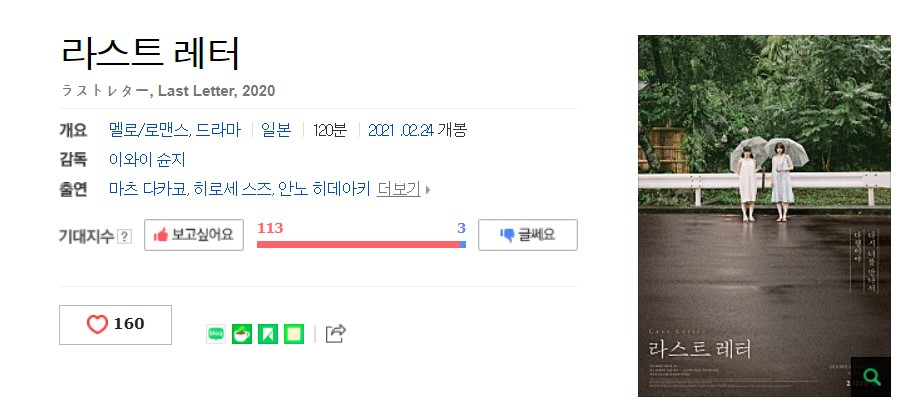